In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
# city_df = pd.DataFrame(city_data_to_load)
# ride_df = pd.DataFrame(ride_data_to_load)
# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_data = pd.read_csv(city_data_to_load)
city_df = pd.DataFrame(city_data)
#ride_df = pd.DataFrame(ride_data_to_load)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data= pd.read_csv(ride_data_to_load)
ride_df = pd.DataFrame(ride_data)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
combined_df = pd.merge(ride_df, city_df, left_on = 'city', right_on = 'city', how = 'left')#, on = 'city')
combined_df.head() #pd.merge(info_pd, items_pd, on="customer_id")

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
len(combined_df)

2375

## Bubble Plot of Ride Sharing Data - incomplete

In [21]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = combined_df[combined_df["type"] == "Urban"]
suburban_cities = combined_df[combined_df["type"] == "Suburban"]
rural_cities = combined_df[combined_df["type"] == "Rural"]

print(type(urban_cities))

<class 'pandas.core.frame.DataFrame'>


In [22]:
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
print(type(urban_ride_count))


<class 'pandas.core.series.Series'>


In [24]:
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
print(type(suburban_ride_count))

<class 'pandas.core.series.Series'>


In [25]:
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]
print(type(rural_ride_count))

<class 'pandas.core.series.Series'>


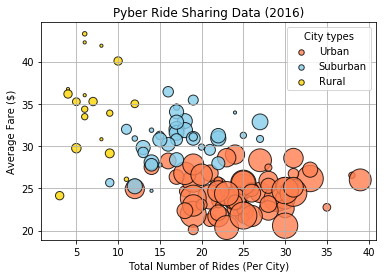

In [26]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


#types = ['a','b', 'c']
# Create a legend
lgnd = plt.legend( title='City types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]



In [ ]:
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()


'''fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5'''

## Total Fares by City Type 

In [83]:
# Calculate Type Percents
grouped = combined_df.groupby('type')
grouped.head()
# Build Pie Chart

# Save Figure


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [85]:
urban = grouped.get_group("Urban")

In [91]:
urban.isna().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [86]:
urban_pct = (len(urban)/len(combined_df)) * 100
urban_pct

68.42105263157895

In [93]:
rural = grouped.get_group("Rural")

In [94]:
rural_pct =  (len(rural)/len(combined_df)) * 100
rural_pct

5.263157894736842

In [95]:
suburban = grouped.get_group("Suburban")

In [97]:
suburb_pct = (len(suburban)/len(combined_df)) * 100
suburb_pct

26.31578947368421

<function matplotlib.pyplot.show(*args, **kw)>

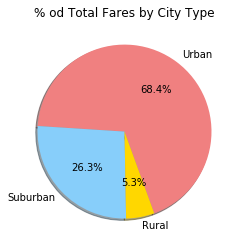

In [123]:
labels = 'Urban', 'Suburban', 'Rural'
pieces = [urban_pct, suburb_pct, rural_pct]

plt.pie(pieces, labels = labels, autopct='%1.1f%%', shadow = True ,startangle = 290, colors = ['lightcoral', 'lightskyblue', 'gold'] )

plt.title("% od Total Fares by City Type")
plt.show

## Total Rides by City Type 

In [125]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
urban.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [128]:
urban_ride_num = urban['ride_id'].count()
urban_ride_num

1625

In [129]:
suburb_ride_num = suburban['ride_id'].count()
suburb_ride_num

625

In [130]:
rural_ride_num = rural['ride_id'].count()
rural_ride_num

125

In [131]:
urb_ride_pct = (urban_ride_num/len(combined_df))*100
urb_ride_pct

68.42105263157895

In [132]:
sub_ride_pct = (suburb_ride_num/len(combined_df))*100
sub_ride_pct

26.31578947368421

In [133]:
rural_ride_pct = (rural_ride_num/len(combined_df)) *100
rural_ride_pct

5.263157894736842

<function matplotlib.pyplot.show(*args, **kw)>

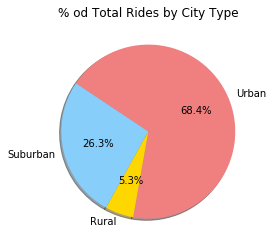

In [135]:
labels = 'Urban', 'Suburban', 'Rural'
pieces = [urb_ride_pct, sub_ride_pct, rural_ride_pct]

plt.pie(pieces, labels = labels, autopct='%1.1f%%', shadow = True ,startangle = 260, colors = ['lightcoral', 'lightskyblue', 'gold'] )

plt.title("% od Total Rides by City Type")
plt.show

## Total Drivers by City Type

In [136]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
urban.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [140]:
total_drivers = combined_df['driver_count'].sum()
total_drivers

68709

In [138]:
total_urban_drivers = urban['driver_count'].sum()
total_urban_drivers

59602

In [141]:
pct_urban = (total_urban_drivers/total_drivers)*100
pct_urban

86.74555007349838

In [142]:
total_sub_drivers = suburban['driver_count'].sum()
total_sub_drivers

8570

In [143]:
pct_suburb = (total_sub_drivers/total_drivers)*100
pct_suburb

12.472892925235413

In [144]:
total_rural_drivers = rural['driver_count'].sum()
total_rural_drivers


537

In [145]:
pct_rural = (total_rural_drivers/total_drivers)*100
pct_rural

0.7815570012662096

<function matplotlib.pyplot.show(*args, **kw)>

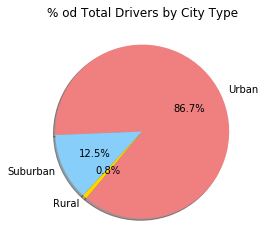

In [146]:
labels = 'Urban', 'Suburban', 'Rural'
pieces = [pct_urban, pct_suburb, pct_rural]

plt.pie(pieces, labels = labels, autopct='%1.1f%%', shadow = True ,startangle = 230, colors = ['lightcoral', 'lightskyblue', 'gold'] )

plt.title("% od Total Drivers by City Type")
plt.show